In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [2]:
physical_measures_df = pd.read_csv('Copia de Physical_measures_data.tsv', sep='\t', low_memory=False)

In [3]:
physical_measures_chars_df = pd.read_csv('Copia-de-Physical_measures_chars.csv', sep=',')

In [4]:
physical_measures_df.head()

,eid,f_21_0_0,f_21_1_0,f_21_2_0,f_21_3_0,f_36_0_0,f_36_1_0,f_36_2_0,f_36_3_0,f_37_0_0,...,f_23128_3_0,f_23129_0_0,f_23129_1_0,f_23129_2_0,f_23129_3_0,f_23130_0_0,f_23130_1_0,f_23130_2_0,f_23130_3_0,f_39_0_0
0,1000012,1.0,NaN,NaN,NaN,3782.0,NaN,NaN,NaN,NaN,...,NaN,18.7,NaN,NaN,NaN,17.9,NaN,NaN,NaN,002872
1,1000021,1.0,NaN,NaN,NaN,3780.0,NaN,NaN,NaN,NaN,...,NaN,37.9,NaN,NaN,NaN,36.5,NaN,NaN,NaN,002872
2,1000035,1.0,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,...,NaN,22.5,NaN,NaN,NaN,21.5,NaN,NaN,NaN,002882
3,1000044,1.0,3.0,NaN,NaN,3780.0,1046.0,NaN,NaN,NaN,...,NaN,44.0,NaN,NaN,NaN,42.3,NaN,NaN,NaN,002898
4,1000053,1.0,NaN,NaN,NaN,1058.0,NaN,NaN,NaN,NaN,...,NaN,25.3,NaN,NaN,NaN,24.2,NaN,NaN,NaN,002889


In [5]:
physical_measures_chars_df.head()

,Field,FieldID,ValueType,Coding,Category,Participants,Items,Stability,Units,ItemType,Strata,Sexed,Instances,Array,Notes,Link,Path
0,Weight method,21,Categorical single,100261.0,100010,500718,595701,Complete,NaN,Data,Primary,Unisex,4,1,Indicates whether weight was entered into the ...,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=21,Assessment centre > Physical measures > Anthro...
1,Blood pressure device ID,36,Text,NaN,100011,498814,585914,Complete,NaN,Data,Auxiliary,Unisex,4,1,Blood pressure (Omron) gadget ID,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=36,Assessment centre > Physical measures > Blood ...
2,Blood pressure manual sphygmomanometer device ID,37,Text,NaN,100011,498814,585914,Complete,NaN,Data,Auxiliary,Unisex,4,1,Blood pressure manual sphygmomanometer gadget ID,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=37,Assessment centre > Physical measures > Blood ...
3,Height measure device ID,39,Text,NaN,100010,498057,591956,Complete,NaN,Data,Auxiliary,Unisex,4,1,Height measure gadget id,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=39,Assessment centre > Physical measures > Anthro...
4,Manual scales device ID,40,Text,NaN,100010,498057,591956,Complete,NaN,Data,Auxiliary,Unisex,4,1,Manual scales gadget id,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=40,Assessment centre > Physical measures > Anthro...


In [4]:
# Se crea diccionario con los nombres de las columnas
column_dic = {}
for column in physical_measures_df.columns.drop('eid'):
    try:
        field_id = column.split('_')[1]
        match = physical_measures_chars_df.loc[physical_measures_chars_df['FieldID'].astype(str) == field_id,'Field']
        if not match.empty:
            column_dic[column] = f"{match.iloc[0]}_{column.split('_')[2]}_{column.split('_')[3]}"
    except IndexError:
        print(f"¡Formato inesperado en columna {column} Se omitirá.")

# Se renombra las columnas con el diccionario anterior
physical_measures_df.rename(columns=column_dic, inplace=True)

In [5]:
physical_measures_df.shape

(502180, 249)

Duplicate columns

In [6]:
duplicate_list = physical_measures_df.columns[physical_measures_df.columns.duplicated()].to_list()
print(len(duplicate_list),"duplicated columns found")
print("Duplicate columns:", duplicate_list)

8 duplicated columns found
Duplicate columns: ['Weight_0_0', 'Weight_1_0', 'Weight_2_0', 'Weight_3_0', 'Body mass index (BMI)_0_0', 'Body mass index (BMI)_1_0', 'Body mass index (BMI)_2_0', 'Body mass index (BMI)_3_0']


Rename duplicate columns

In [7]:
cols = physical_measures_df.columns.tolist()
for duplicate_cols in duplicate_list:
    idx = [i for i, x in enumerate(cols) if x == duplicate_cols]
    physical_measures_df.columns.values[idx[0]] = f'0_{duplicate_cols}'
    physical_measures_df.columns.values[idx[1]] = f'1_{duplicate_cols}'

In [8]:
# Subtract the columns
res = physical_measures_df['0_Weight_0_0'] - physical_measures_df['1_Weight_0_0']
print('Maximum difference:', res.max())
print('Minimum difference:', res.min())

Maximum difference: 0.0
Minimum difference: 0.0


In [9]:
# Subtract the columns
res = physical_measures_df['0_Body mass index (BMI)_0_0'] - physical_measures_df['1_Body mass index (BMI)_0_0']
print('Maximum difference:', res.max())
print('Minimum difference:', res.min())

Maximum difference: 4.587600000000002
Minimum difference: -13.303799999999999


Combine duplicate columns

In [10]:
for duplicate_cols in duplicate_list:
    # Merge the columns
    # Use combine_first to fill NaN values in the first column with values from the second column
    physical_measures_df[duplicate_cols] = physical_measures_df[f'0_{duplicate_cols}'].combine_first(physical_measures_df[f'1_{duplicate_cols}'])
    # Romve columns with suffixes
    physical_measures_df.drop([f'0_{duplicate_cols}', f'1_{duplicate_cols}'], axis=1, inplace=True)

In [11]:
duplicate_list = physical_measures_df.columns[physical_measures_df.columns.duplicated()].to_list()
print(len(duplicate_list), "duplicated columns found")
print("Duplicate columns:", duplicate_list)


0 duplicated columns found
Duplicate columns: []


Changing data type

In [12]:

# text type variables according to chars file
col_text = ['Blood pressure device ID','Blood pressure manual sphygmomanometer device ID','Height measure device ID',
            'Manual scales device ID','Seating box device ID','Impedance device ID','Tape measure device ID']

# categorical variables according to chars file
col_categories = ['Weight method', 'Seating box height', 'Method of measuring blood pressure',
                  'Reason for skipping weight', 'Reason for skipping hip measurement','Reason for skipping standing height',
                  'Reason for skipping sitting height']

for col in physical_measures_df.columns:
  
  # get the column name without the suffix
  col_name = col.split('_')[0]
  # Verify if the column name is in the text or categories list
  # and change the corresponding data type
  if col_name in col_text:
    physical_measures_df[col] = physical_measures_df[col].astype('string')
  if col_name in col_categories:
    physical_measures_df[col] = physical_measures_df[col].astype("Int32").astype('category')

Deleting (Irrelevant) columns of text type

In [13]:
for col in physical_measures_df.columns:
    col_name = col.split('_')[0]
    if col_name in col_text:
        physical_measures_df.drop(col, axis=1, inplace=True)

In [14]:
physical_measures_df.shape

(502180, 215)

Merging sample sections

In [15]:
# Create a new DataFrame to store the merged columns
new_physical_measures_df = pd.DataFrame(physical_measures_df['eid'])

for col in physical_measures_df.columns[1:]:
    # get the column name without the suffix
    col_name = col.split('_')[0]
    
    # Check if the column name already exists in the new DataFrame
    # if it exists, combine the columns
    if col_name in new_physical_measures_df:
        new_physical_measures_df[col_name] = new_physical_measures_df[col_name].combine_first(physical_measures_df[col])
    else:
        # If it doesn't exist, add the column to the new DataFrame
        new_physical_measures_df[col_name] = physical_measures_df[col]

In [16]:
new_physical_measures_df.shape

(502180, 54)

Deleting irrelevant variables

In [17]:
new_physical_measures_df.drop(['Method of measuring blood pressure','Weight method','Time since interview start at which blood pressure screen(s) shown','Seated height','Seating box height','Sitting height','Body mass index (BMI)'], axis=1, inplace=True)

Date types and null values

In [ ]:
# Dataframe with amount of null values
# and percentage of null values
info = pd.DataFrame({
    'Type': new_physical_measures_df.dtypes,
    'Null_values': new_physical_measures_df.isnull().sum(),
    'Null_Percentage': (new_physical_measures_df.isnull().sum() / len(new_physical_measures_df)) * 100,
    'Unique_values': new_physical_measures_df.nunique()
})
print(info.sort_values(by='Null_Percentage', ascending=False))

                                                    Type  Null_values  \
Reason for skipping hip measurement             category       501676   
Reason for skipping standing height             category       501357   
Reason for skipping sitting height              category       501337   
Reason for skipping weight                      category       501136   
Weight, manual entry                             float64       492109   
Diastolic blood pressure, manual reading         float64       450676   
Pulse rate (during blood-pressure measurement)   float64       450676   
Systolic blood pressure, manual reading          float64       450676   
Height                                           float64       424554   
Weight (pre-imaging)                             float64       424554   
Systolic blood pressure, automated reading       float64        26375   
Diastolic blood pressure, automated reading      float64        26370   
Pulse rate, automated reading                    fl

Deleting columns with a percentage greater than 80% NaN

In [20]:
null_cols  = info[info['Null_Percentage'] > 80].sort_values(by='Null_Percentage', ascending=False)
null_cols_list = null_cols.index.tolist()
new_physical_measures_df.drop(null_cols_list, axis=1, inplace=True)

Correlation between similar columns

In [ ]:
similar_cols = ['Impedance of leg', 'Impedance of arm', 'Leg fat percentage', 'Leg fat mass', 'Leg fat-free mass', 'Leg predicted mass','Arm fat percentage', 'Arm fat mass', 'Arm fat-free mass', 'Arm predicted mass',]

for col in similar_cols:
    corelation = new_physical_measures_df[f'{col} (right)'].corr(new_physical_measures_df[f'{col} (left)'])
    print(f"Correlation between {col} (right) y {col} (left):", corelation)

Correlatuin between Impedance of leg (right) y Impedance of leg (left): 0.9341418521042638
Correlatuin between Impedance of arm (right) y Impedance of arm (left): 0.9530761011782383
Correlatuin between Leg fat percentage (right) y Leg fat percentage (left): 0.990164254231858
Correlatuin between Leg fat mass (right) y Leg fat mass (left): 0.9925363144047529
Correlatuin between Leg fat-free mass (right) y Leg fat-free mass (left): 0.9917257115483203
Correlatuin between Leg predicted mass (right) y Leg predicted mass (left): 0.9919179200611544
Correlatuin between Arm fat percentage (right) y Arm fat percentage (left): 0.9895997568116556
Correlatuin between Arm fat mass (right) y Arm fat mass (left): 0.9934862065939909
Correlatuin between Arm fat-free mass (right) y Arm fat-free mass (left): 0.9878851878395363
Correlatuin between Arm predicted mass (right) y Arm predicted mass (left): 0.9884620501266848


In [22]:
for col in similar_cols:
    # calcular la diferencia absoluta
    diff = np.abs(new_physical_measures_df[f'{col} (right)'] - new_physical_measures_df[f'{col} (left)'])
    print(f"mean absolute difference between {col} (right) y {col} (left):", diff.mean())

mean absolute difference between Impedance of leg (right) y Impedance of leg (left): 8.149665495851417
mean absolute difference between Impedance of arm (right) y Impedance of arm (left): 11.891502379333787
mean absolute difference between Leg fat percentage (right) y Leg fat percentage (left): 0.9041614159406969
mean absolute difference between Leg fat mass (right) y Leg fat mass (left): 0.12764476931069194
mean absolute difference between Leg fat-free mass (right) y Leg fat-free mass (left): 0.18200644924315756
mean absolute difference between Leg predicted mass (right) y Leg predicted mass (left): 0.17082808235162808
mean absolute difference between Arm fat percentage (right) y Arm fat percentage (left): 1.2511199558350143
mean absolute difference between Arm fat mass (right) y Arm fat mass (left): 0.08614621076028378
mean absolute difference between Arm fat-free mass (right) y Arm fat-free mass (left): 0.08378517724622853
mean absolute difference between Arm predicted mass (right) 

Averaging similar columns

In [23]:
for col in similar_cols:
    # Average the values of the right and left columns
    new_physical_measures_df[col] = new_physical_measures_df[[f'{col} (right)', f'{col} (left)']].mean(axis=1)
    # Drop the original right and left columns
    new_physical_measures_df.drop([f'{col} (right)', f'{col} (left)'], axis=1, inplace=True)

In [24]:
new_physical_measures_df.shape

(502180, 27)

Deleting NaN

In [25]:
# Delete columns with all NaN values
# except 'eid'
columns_to_verify = new_physical_measures_df.columns.difference(['eid'])
new_physical_measures_df = new_physical_measures_df.dropna(how='all', subset=columns_to_verify)

Replacing NaN values ​​with the column mean

In [ ]:
# Iterate each column and fill NaN values with the mean of the column
for col in new_physical_measures_df.columns:
    if new_physical_measures_df[col].isnull().sum() > 0:
        mean_value = new_physical_measures_df[col].mean()
        new_physical_measures_df[col] = new_physical_measures_df[col].fillna(mean_value)

In [27]:
new_physical_measures_df.to_csv('new_physical_measures_df.csv', index=False)

In [3]:
new_physical_measures_df = pd.read_csv('new_physical_measures_df.csv', sep=',')

In [ ]:
arm_columns = ['Arm fat mass', 'Arm fat-free mass','Arm predicted mass']
trunk_columns = [ 'Trunk fat mass', 'Trunk fat-free mass','Trunk predicted mass']
body_columns = [ 'Whole body fat mass', 'Whole body fat-free mass','Whole body water mass']
percentage_columns = [ 'Body fat percentage','Trunk fat percentage','Arm fat percentage','Leg fat percentage' ]
impedance_columns = ['Impedance of whole body', 'Impedance of leg', 'Impedance of arm']
selected_columns = ['Hip circumference', 'Waist circumference', 'Standing height']
leg_columns = [ 'Leg fat mass', 'Leg fat-free mass','Leg predicted mass']
group_map = {
    'Kg': [trunk_columns, arm_columns, leg_columns, body_columns],
    'Percentage': [percentage_columns],
    'ohms': [impedance_columns],
    'cms': [selected_columns],
}

Boxpolts

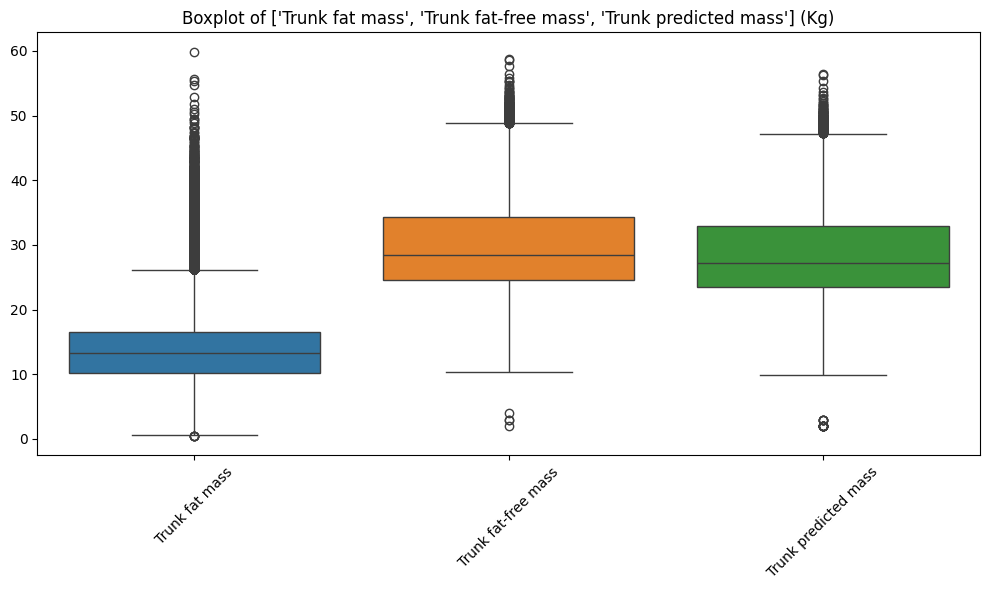

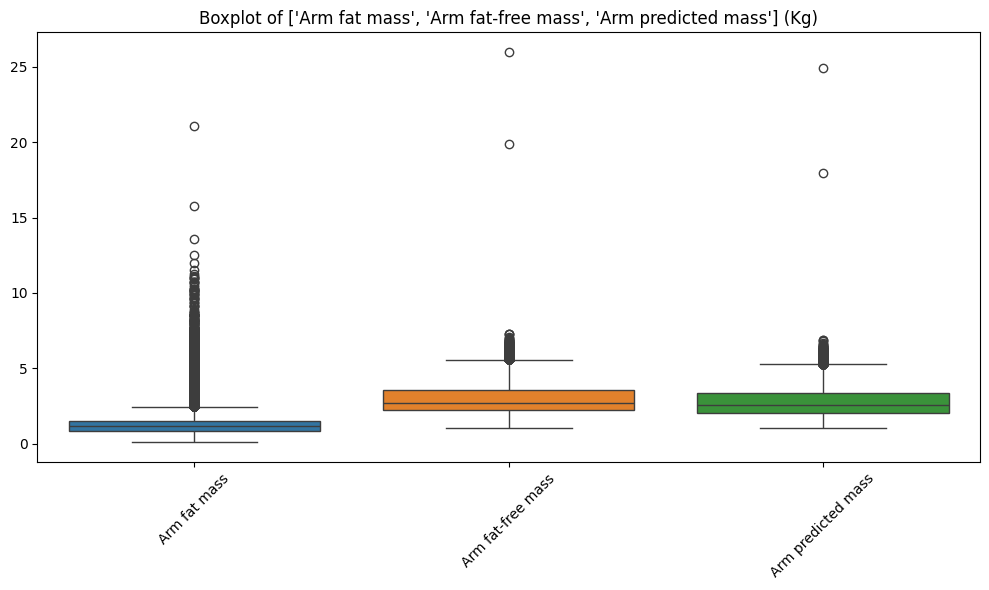

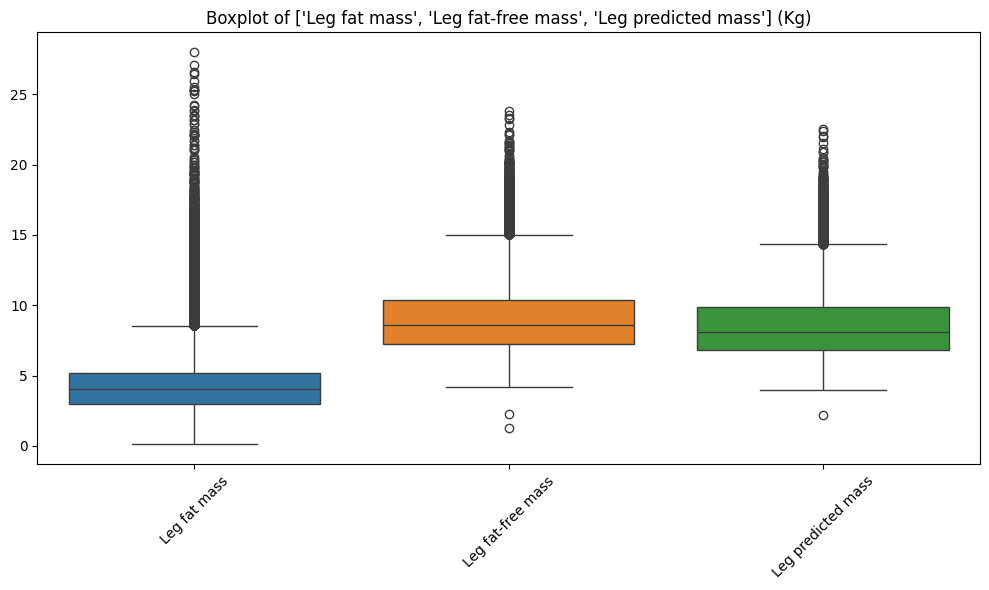

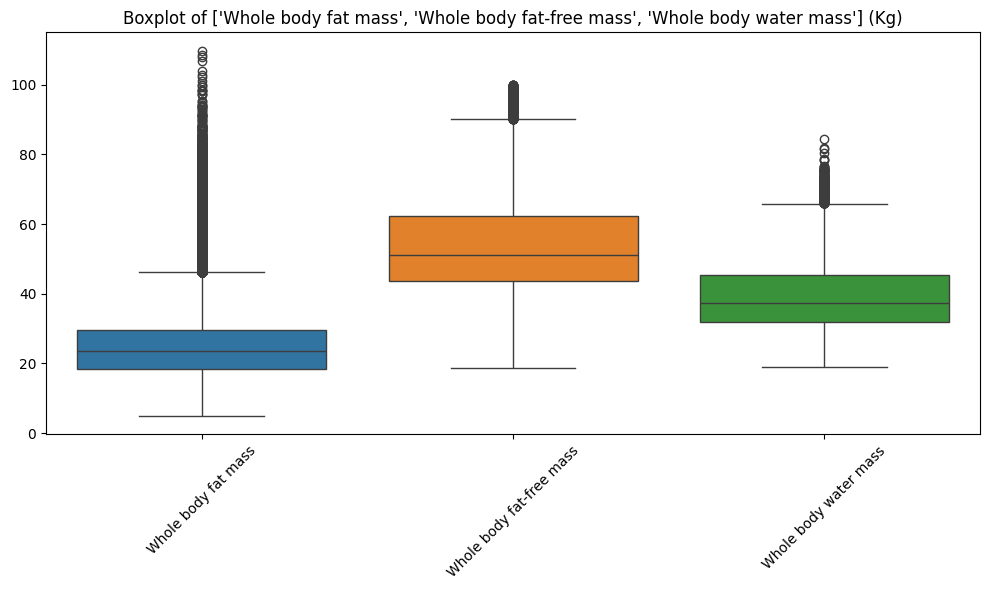

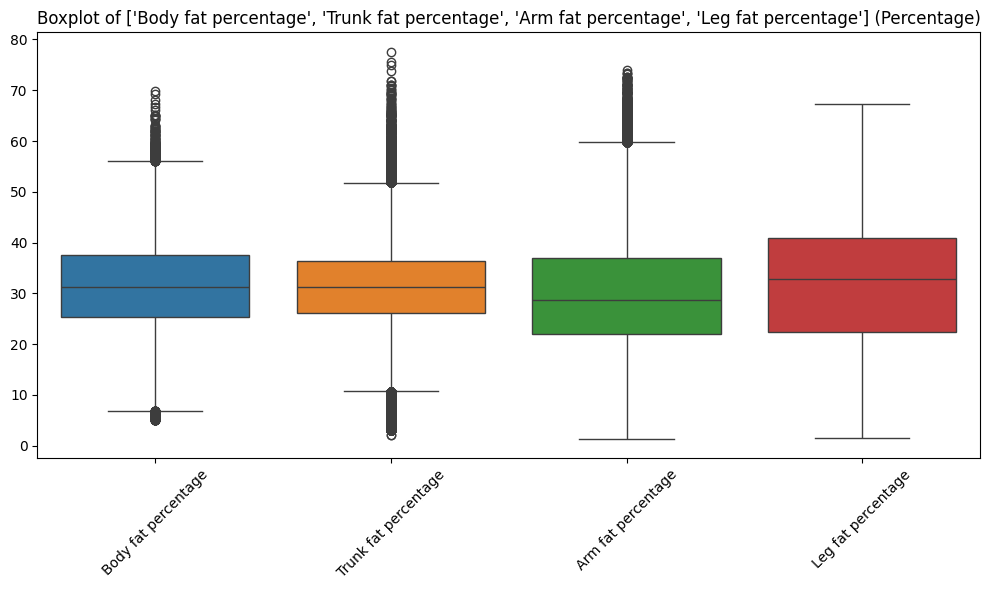

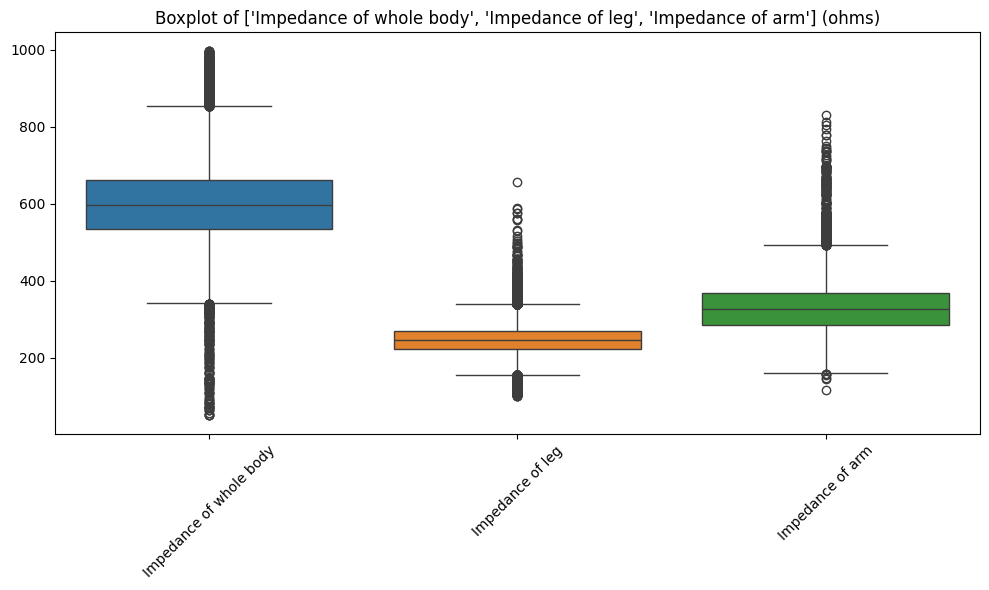

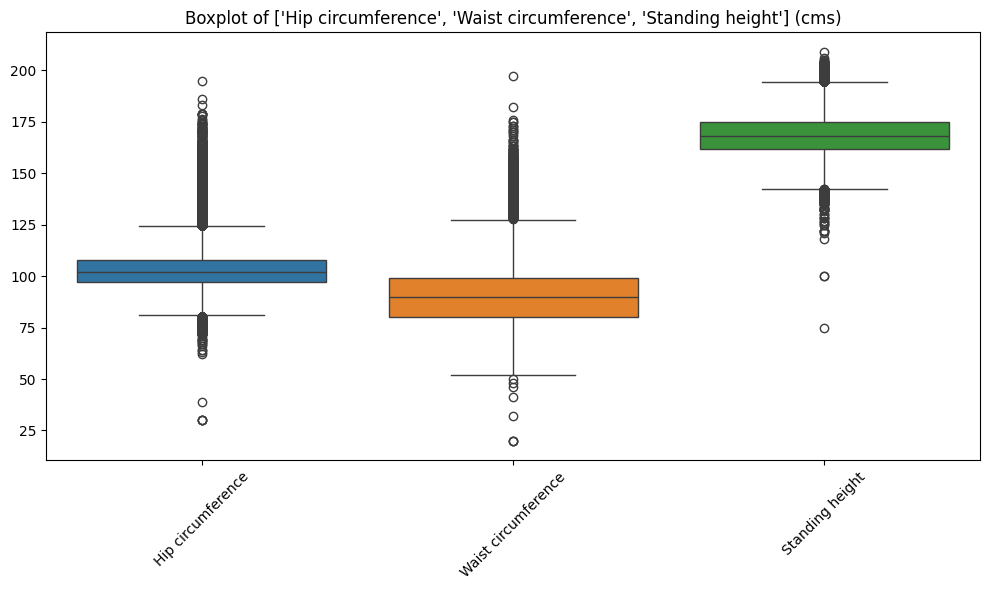

In [ ]:
# create a boxplot for each group
for unit, groups in group_map.items():
    for group in groups:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=new_physical_measures_df[group])
        plt.title(f'Boxplot of {group} ({unit})')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Histograms

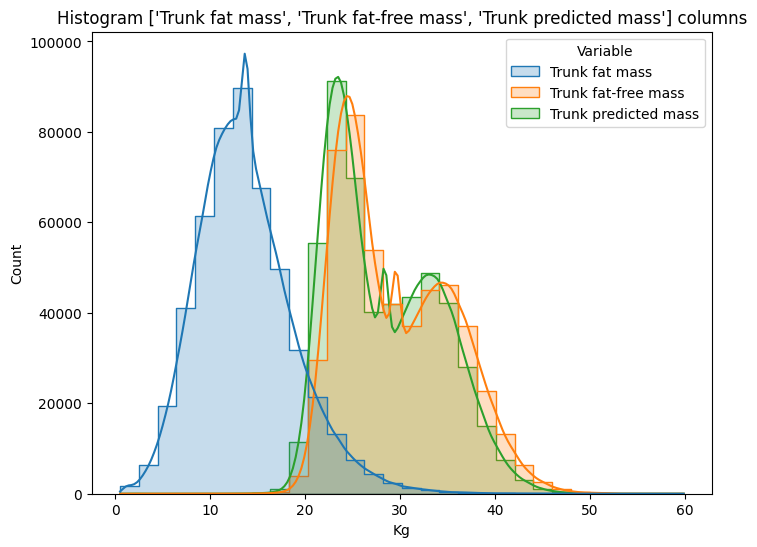

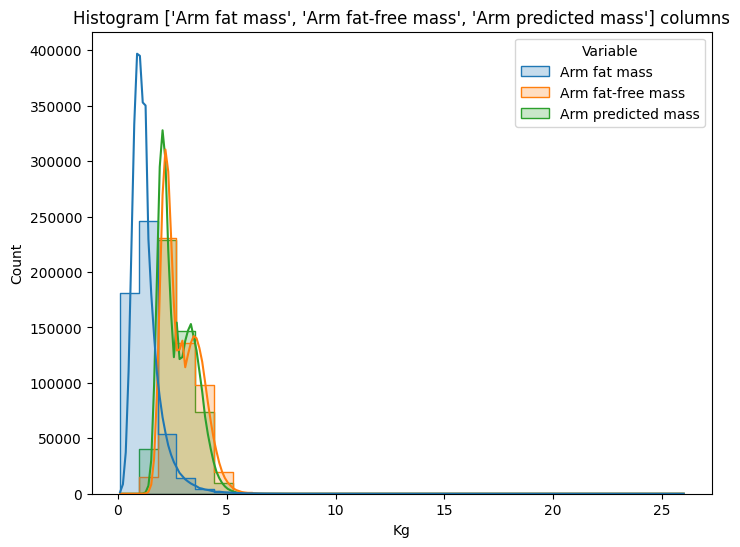

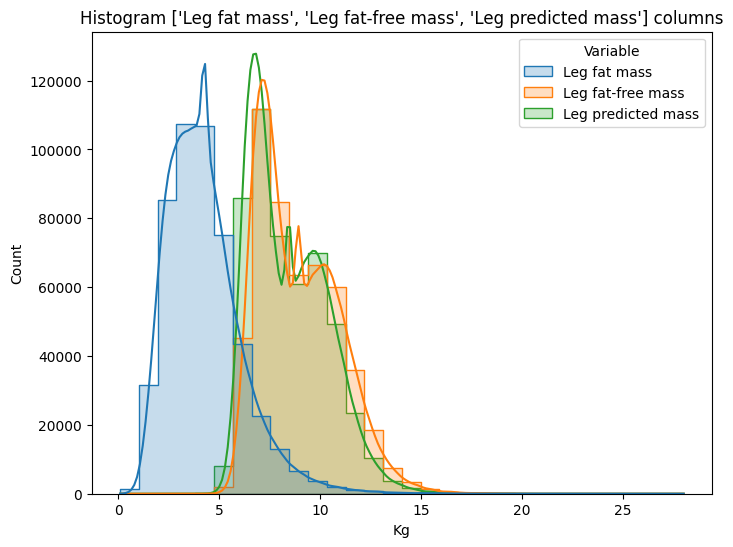

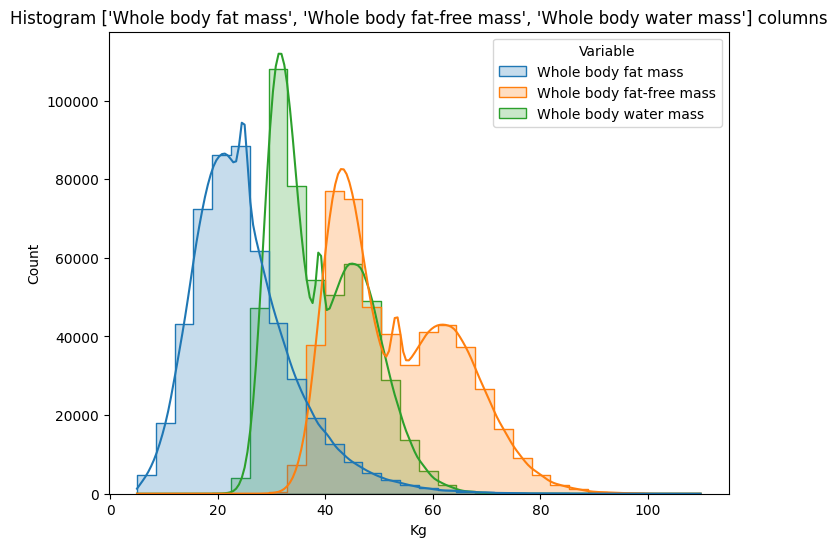

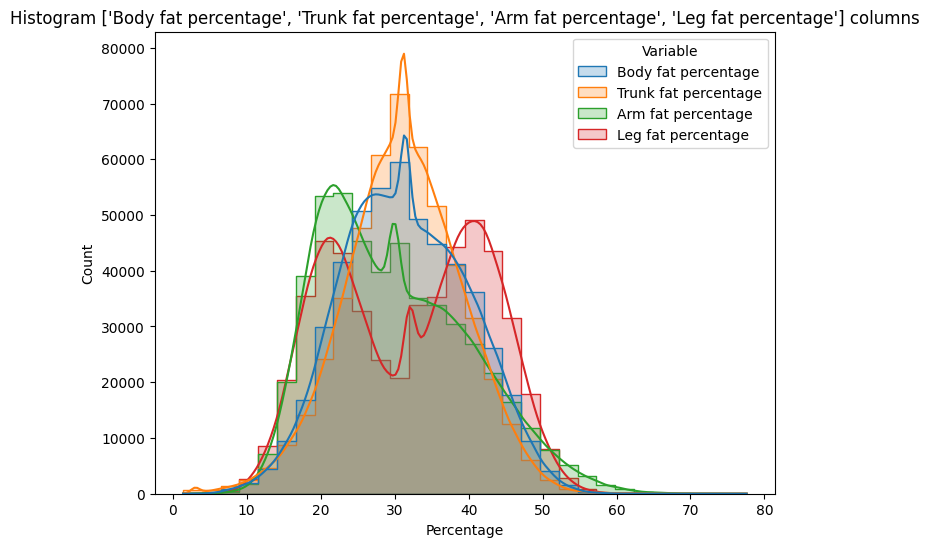

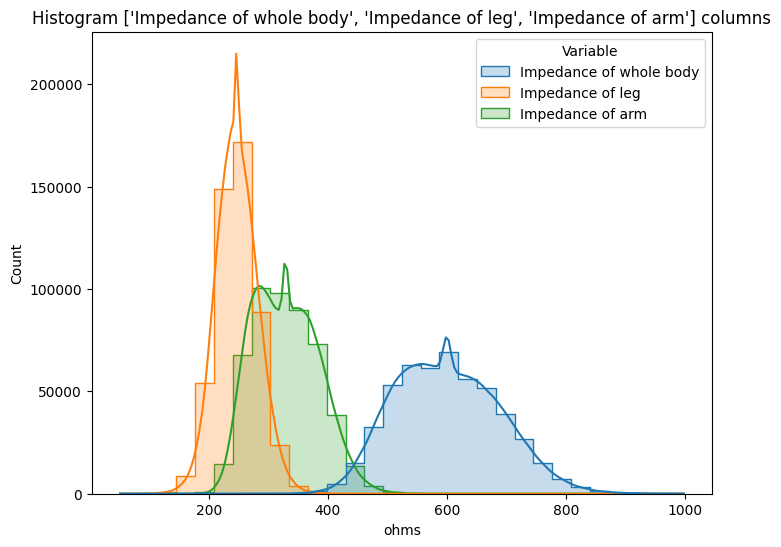

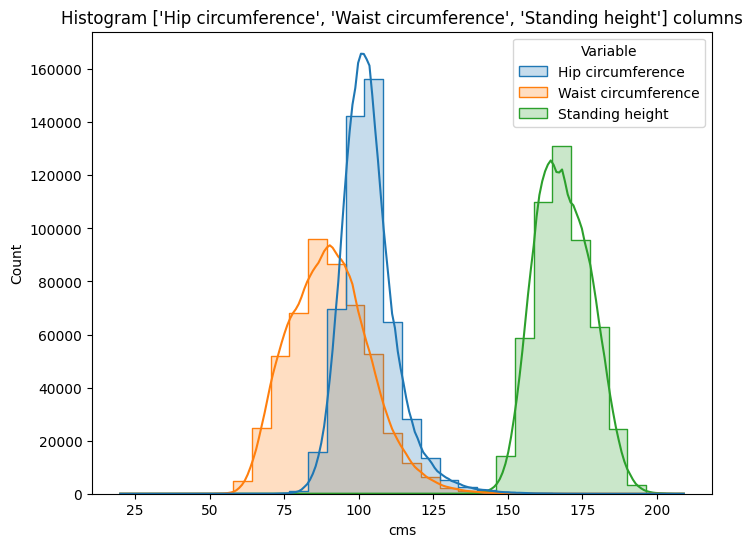

In [ ]:
# Iterate over the groups and create a histogram for each group
for group, columns in group_map.items():
    for column_group in columns:
        df_long = new_physical_measures_df[column_group].melt(var_name='Variable', value_name=group)
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df_long, x=group, hue='Variable', bins=30, kde=True, element="step")
        plt.title(f"Histogram {column_group} columns")
        plt.show()

Detect and remove Outliers

In [ ]:
# Function to print outliers
def print_outliers(df):
    outliers_info = []
    for col in df.select_dtypes(include='number').columns:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        count_outliers = outliers.shape[0]
        total = df[col].shape[0]
        proportion = count_outliers / total
        # Append to the list
        outliers_info.append({
            'Column': col,
            'Outliers': count_outliers,
            'Total_data': total,
            'Outliers_proportion': proportion
        })
    outliers_df = pd.DataFrame(outliers_info)

    print(outliers_df)

In [ ]:
# Columns with outliers before removing them
print_outliers(new_physical_measures_df)

                                         Column  Outliers  Total_data  \
0                                           eid         0      501288   
1                           Waist circumference      4029      501288   
2                             Hip circumference     14742      501288   
3                               Standing height      1142      501288   
4                 Pulse rate, automated reading     10259      501288   
5   Diastolic blood pressure, automated reading      4568      501288   
6    Systolic blood pressure, automated reading      7173      501288   
7                           Body fat percentage       479      501288   
8                           Whole body fat mass     15922      501288   
9                      Whole body fat-free mass       595      501288   
10                        Whole body water mass       662      501288   
11                      Impedance of whole body      1725      501288   
12                         Trunk fat percentage    

In [ ]:
# Fucntion to replace outliers with the mean
def replace_outliers_tukey_with_media(df):
    new_df = df.copy()
    for col in new_df.select_dtypes(include='number').columns:
         while True:
            new_df[col] = new_df[col].astype(float)
            Q1 = new_df[col].quantile(0.25)
            Q3 = new_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify Outliers
            outliers = (new_df[col] < lower_bound) | (new_df[col] >  upper_bound)

            num_outliers = outliers.sum()

            if num_outliers == 0:
                break  

                
            # Calculate mean without outliers
            mean_without_outliers = new_df.loc[~outliers, col].mean()
                
            # Replace outliers with the mean
            new_df.loc[outliers, col] = mean_without_outliers

    return new_df


In [ ]:
# Remove outliers using Tukey's method
preprocessed_physical_measures_df = replace_outliers_tukey_with_media(new_physical_measures_df)

In [ ]:
# Columns after removing outliers
print_outliers(preprocessed_physical_measures_df)

                                         Column  Outliers  Total_data  \
0                                           eid         0      501288   
1                           Waist circumference         0      501288   
2                             Hip circumference         0      501288   
3                               Standing height         0      501288   
4                 Pulse rate, automated reading         0      501288   
5   Diastolic blood pressure, automated reading         0      501288   
6    Systolic blood pressure, automated reading         0      501288   
7                           Body fat percentage         0      501288   
8                           Whole body fat mass         0      501288   
9                      Whole body fat-free mass         0      501288   
10                        Whole body water mass         0      501288   
11                      Impedance of whole body         0      501288   
12                         Trunk fat percentage    

Descriptive statistics

In [57]:
# Describe each column without 'eid'
preprocessed_physical_measures_df[preprocessed_physical_measures_df.columns.difference(['eid'])].describe().T

,count,mean,std,min,25%,50%,75%,max
Arm fat mass,501288.0,1.126431,0.374301,0.15,0.85,1.126431,1.35,2.10
Arm fat percentage,501288.0,29.872492,9.934977,1.40,21.90,28.650000,36.95,59.50
Arm fat-free mass,501288.0,2.904441,0.810030,1.00,2.20,2.700000,3.55,5.55
Arm predicted mass,501288.0,2.720478,0.773034,1.00,2.05,2.550000,3.35,5.25
Body fat percentage,501288.0,31.447071,8.433766,6.90,25.30,31.300000,37.60,56.00
"Diastolic blood pressure, automated reading",501288.0,81.884220,9.650324,56.00,75.00,82.000000,88.00,107.00
Hip circumference,501288.0,102.399995,7.332923,82.00,97.00,102.000000,107.00,122.00
Impedance of arm,501288.0,328.444303,54.091500,162.00,285.00,327.000000,368.00,492.50
Impedance of leg,501288.0,246.999101,32.636333,158.00,224.50,247.000000,269.00,335.50
Impedance of whole body,501288.0,599.379378,86.335857,344.00,534.00,598.000000,661.00,851.00


Correlation

In [59]:
# Calculate the correlation matrix without 'eid'
corr_matrix = preprocessed_physical_measures_df[preprocessed_physical_measures_df.columns.difference(['eid'])].corr()

In [60]:
# Reset the index and melt the matrix into a long-form DataFrame
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove duplicate pairs (e.g., A-B and B-A) and self-pairs (A-A)
corr_long = corr_long[corr_long['Variable 1'] < corr_long['Variable 2']]

# Sort by covariance in descending order
cov_ranked = corr_long.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

# Display the ranked table
print(cov_ranked.head(10))  # Top 10 highest covariances

                 Variable 1                Variable 2  Correlation
0         Leg fat-free mass        Leg predicted mass     0.999405
1       Trunk fat-free mass      Trunk predicted mass     0.999287
2  Whole body fat-free mass     Whole body water mass     0.999015
3         Arm fat-free mass        Arm predicted mass     0.998371
4       Trunk fat-free mass  Whole body fat-free mass     0.987308
5       Trunk fat-free mass     Whole body water mass     0.986811
6      Trunk predicted mass  Whole body fat-free mass     0.986757
7      Trunk predicted mass     Whole body water mass     0.986289
8        Arm predicted mass     Whole body water mass     0.985913
9         Arm fat-free mass     Whole body water mass     0.985655


In [61]:
#Print the bottom 10 lowest covariances
print(cov_ranked.tail(10)) 

                  Variable 1                Variable 2  Correlation
315  Impedance of whole body      Trunk predicted mass    -0.826203
316  Impedance of whole body       Trunk fat-free mass    -0.827329
317  Impedance of whole body  Whole body fat-free mass    -0.832088
318  Impedance of whole body     Whole body water mass    -0.833677
319         Impedance of arm  Whole body fat-free mass    -0.837198
320         Impedance of arm     Whole body water mass    -0.838190
321         Impedance of arm      Trunk predicted mass    -0.843356
322         Impedance of arm       Trunk fat-free mass    -0.843404
323        Arm fat-free mass          Impedance of arm    -0.857155
324       Arm predicted mass          Impedance of arm    -0.857430


In [62]:
# Select the columns with low correlation
cov_ranked[(cov_ranked['Correlation'] < 0.1) & (cov_ranked['Correlation'] > -0.1)]

,Variable 1,Variable 2,Correlation
188,"Systolic blood pressure, automated reading",Trunk fat percentage,0.092755
189,Body fat percentage,"Diastolic blood pressure, automated reading",0.085273
190,"Pulse rate, automated reading","Systolic blood pressure, automated reading",0.085008
191,"Diastolic blood pressure, automated reading",Leg fat mass,0.083382
192,Arm fat-free mass,Whole body fat mass,0.082621
193,"Diastolic blood pressure, automated reading",Standing height,0.081936
194,Hip circumference,"Pulse rate, automated reading",0.079782
195,Arm predicted mass,Whole body fat mass,0.078683
196,Arm fat percentage,"Diastolic blood pressure, automated reading",0.070846
197,Whole body fat mass,Whole body water mass,0.070545


Heat Map

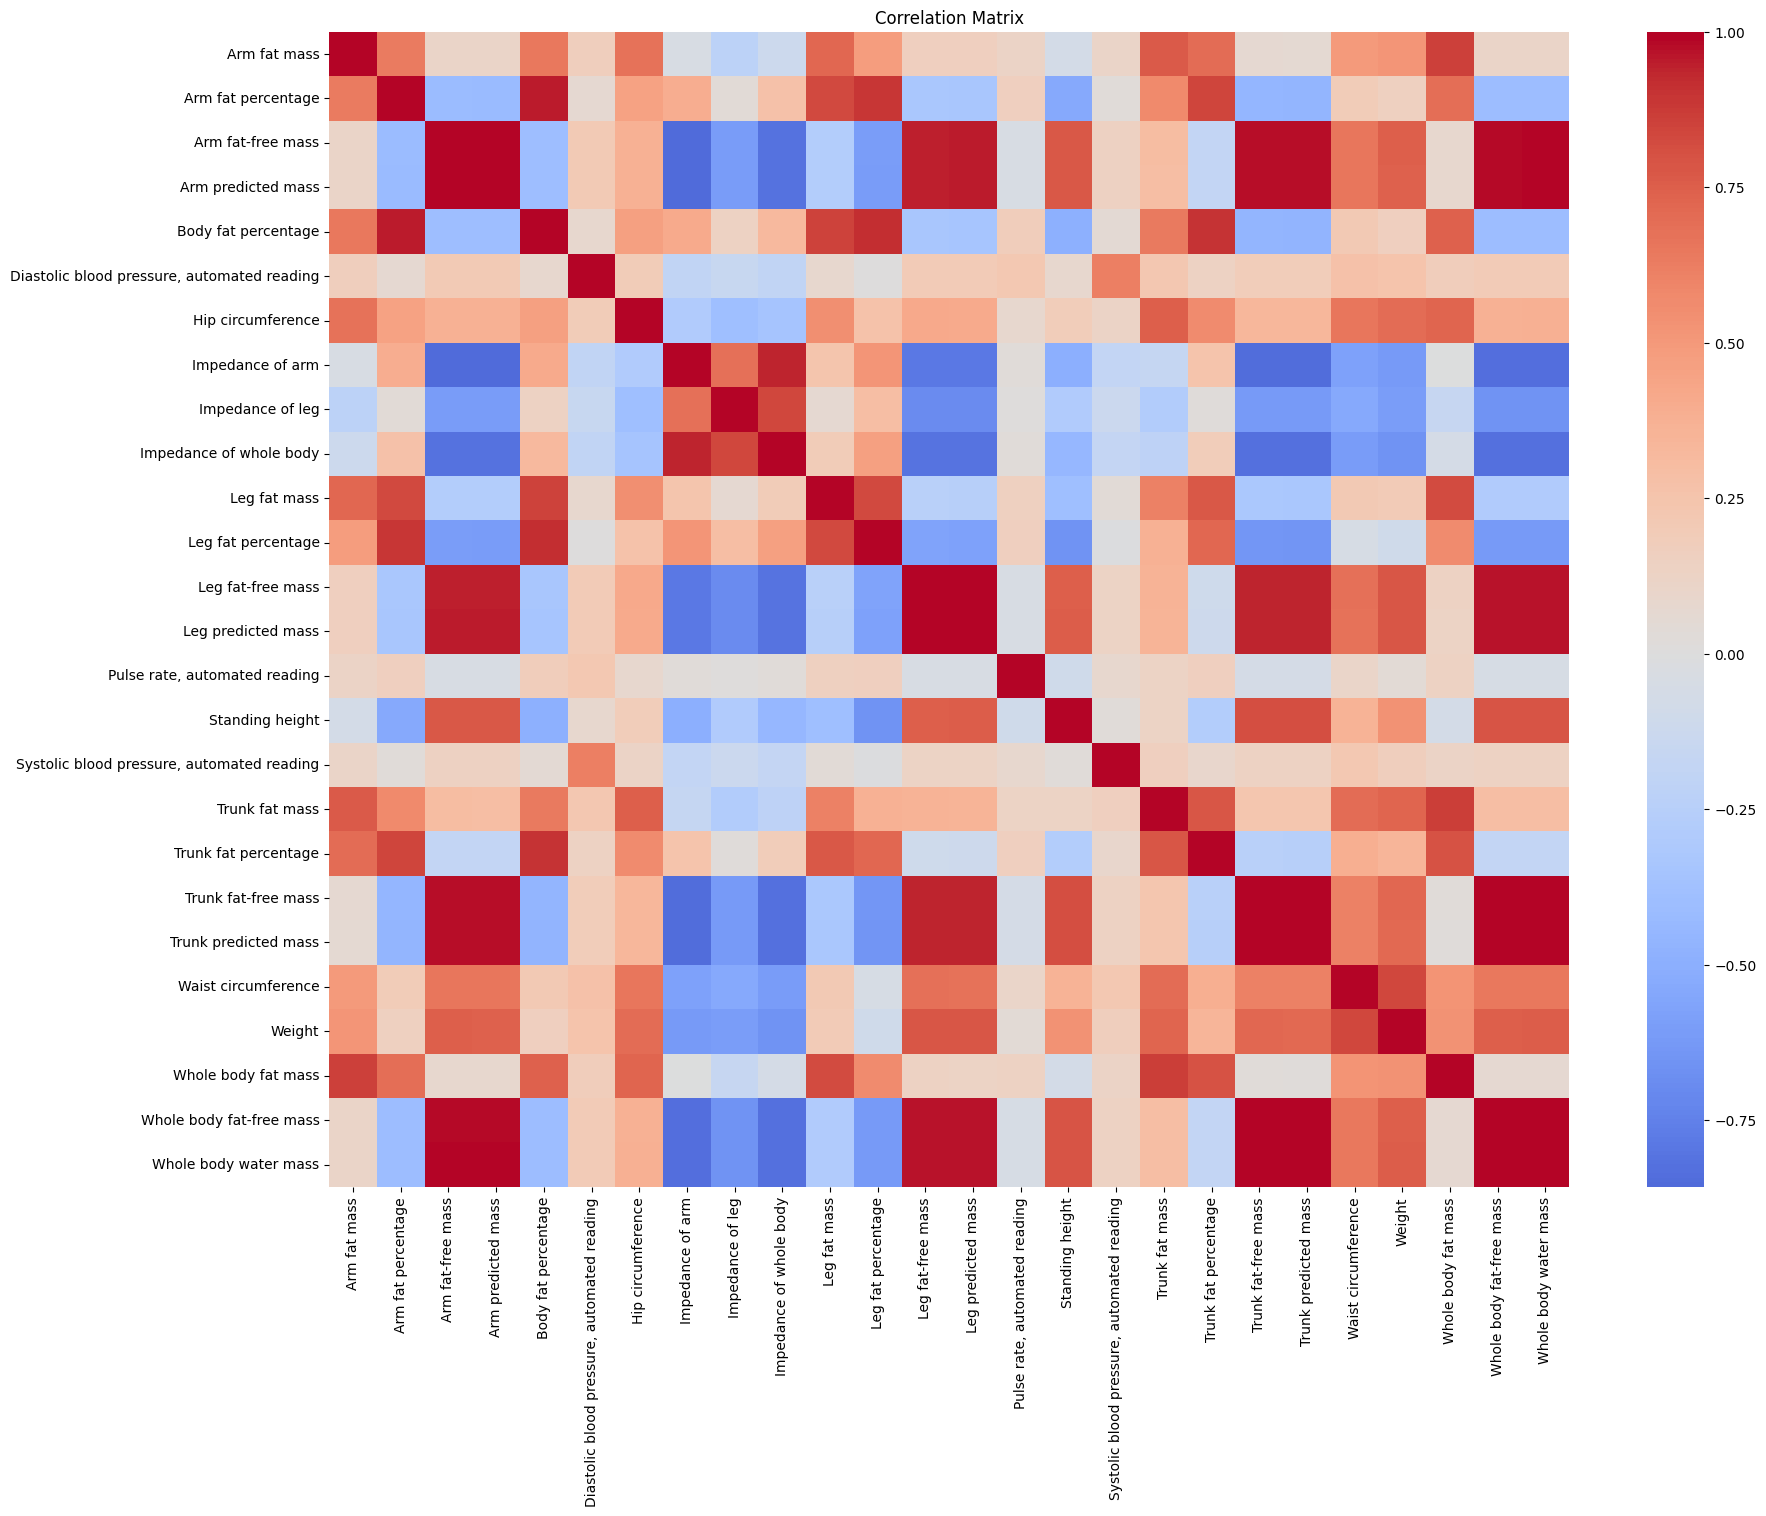

In [63]:
# Plot the correlation matrix 
sample_df = preprocessed_physical_measures_df[preprocessed_physical_measures_df.columns.difference(['eid'])]
corr_matrix = sample_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [74]:
preprocessed_physical_measures_df.to_csv('preprocessed_physical_measures_df.csv', index=False)